<a href="https://colab.research.google.com/github/appliedcode/mthree-c422/blob/mthree-c422-Likhitha/Sentiment_analysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Download NLTK data
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

from nltk.sentiment import SentimentIntensityAnalyzer

# -----------------------------
# Sample Data: Product Reviews
# -----------------------------
reviews = [
    'This product is amazing! I love it.',
    'Terrible experience, will not buy again.',
    'It works as expected. Nothing special.',
    'Absolutely fantastic! Exceeded my expectations.',
    'Not worth the price. Very disappointed.',
    'Great value for money.',
    'The quality is poor and it broke quickly.',
    'I am satisfied with my purchase.',
    'Worst product ever.',
    'Decent, but could be better.'
]
labels = ['positive', 'negative', 'neutral', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'neutral']
df = pd.DataFrame({'review': reviews, 'label': labels})

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


VADER Predictions:
                                            review  vader_score vader_pred
0              This product is amazing! I love it.       0.8516   positive
1         Terrible experience, will not buy again.      -0.4767   negative
2           It works as expected. Nothing special.      -0.3089   negative
3  Absolutely fantastic! Exceeded my expectations.       0.6352   positive
4          Not worth the price. Very disappointed.      -0.6198   negative
5                           Great value for money.       0.7579   positive
6        The quality is poor and it broke quickly.      -0.7096   negative
7                 I am satisfied with my purchase.       0.4215   positive
8                              Worst product ever.      -0.6249   negative
9                     Decent, but could be better.       0.5927   positive


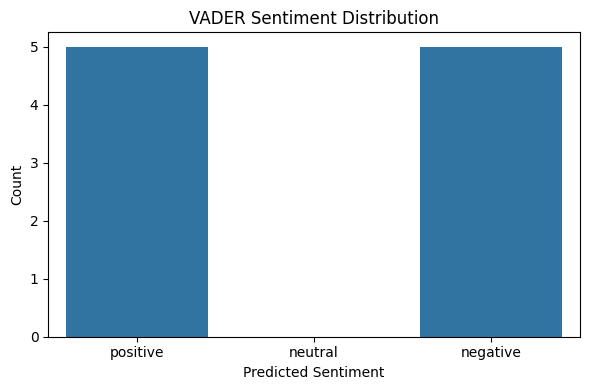

In [ ]:
sia = SentimentIntensityAnalyzer()

df['vader_score'] = df['review'].apply(lambda x: sia.polarity_scores(x)['compound'])

def vader_label(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['vader_pred'] = df['vader_score'].apply(vader_label)

print("VADER Predictions:")
print(df[['review', 'vader_score', 'vader_pred']])

# Visualization
plt.figure(figsize=(6, 4))
sns.countplot(x='vader_pred', data=df, order=['positive', 'neutral', 'negative'])
plt.title('VADER Sentiment Distribution')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()



Logistic Regression Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         1
     neutral       0.00      0.00      0.00         1
    positive       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.11      0.33      0.17         3
weighted avg       0.11      0.33      0.17         3



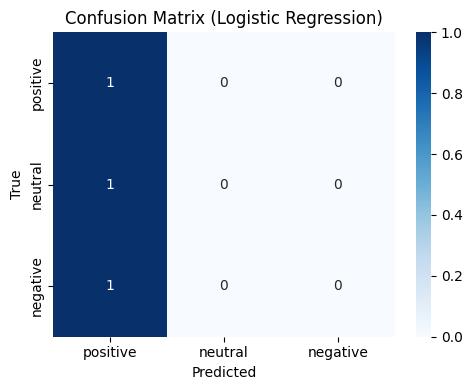

In [ ]:
X = df['review']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

vectorizer = TfidfVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

clf = LogisticRegression(max_iter=200)
clf.fit(X_train_vec, y_train)
y_pred = clf.predict(X_test_vec)

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['positive', 'neutral', 'negative'],
            yticklabels=['positive', 'neutral', 'negative'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Logistic Regression)')
plt.tight_layout()
plt.show()


In [ ]:
negation_examples = [
    'I do not like this product.',
    'Not bad at all!',
    'I can\'t say it\'s good.',
    'This is not the worst experience.',
    'I am not unhappy with the result.'
]

print("\nNegation Handling Examples:")
for text in negation_examples:
    score = sia.polarity_scores(text)['compound']
    label = vader_label(score)
    print(f'"{text}" -> Score: {score:.2f}, Sentiment: {label}')


Negation Handling Examples:
"I do not like this product." -> Score: -0.28, Sentiment: negative
"Not bad at all!" -> Score: 0.48, Sentiment: positive
"I can't say it's good." -> Score: -0.34, Sentiment: negative
"This is not the worst experience." -> Score: 0.51, Sentiment: positive
"I am not unhappy with the result." -> Score: 0.33, Sentiment: positive


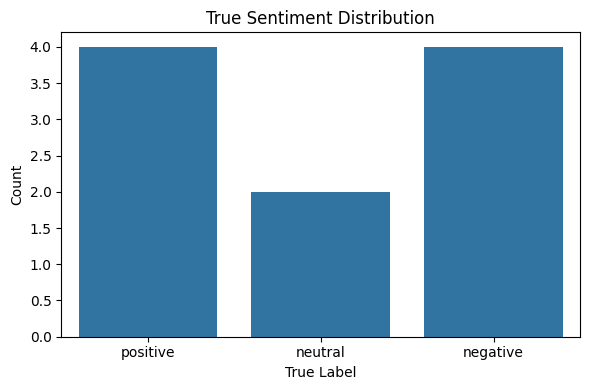

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, order=['positive', 'neutral', 'negative'])
plt.title('True Sentiment Distribution')
plt.xlabel('True Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()